In [42]:
import statsmodels.api as sm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
data_file = '../data/bicycle_counts.csv'

In [25]:
df = pd.read_csv(data_file,index_col=0)
df

,Date,Day,High Temp (°F),Low Temp (°F),Precipitation,Brooklyn Bridge,Manhattan Bridge,Williamsburg Bridge,Queensboro Bridge,Total
0,2016-04-01 00:00:00,2016-04-01 00:00:00,78.1,66.0,0.01,1704.0,3126,4115.0,2552.0,11497
1,2016-04-02 00:00:00,2016-04-02 00:00:00,55.0,48.9,0.15,827.0,1646,2565.0,1884.0,6922
2,2016-04-03 00:00:00,2016-04-03 00:00:00,39.9,34.0,0.09,526.0,1232,1695.0,1306.0,4759
3,2016-04-04 00:00:00,2016-04-04 00:00:00,44.1,33.1,0.47 (S),521.0,1067,1440.0,1307.0,4335
4,2016-04-05 00:00:00,2016-04-05 00:00:00,42.1,26.1,0,1416.0,2617,3081.0,2357.0,9471
...,...,...,...,...,...,...,...,...,...,...
205,2016-04-26 00:00:00,2016-04-26 00:00:00,60.1,46.9,0.24,1997.0,3520,4559.0,2929.0,13005
206,2016-04-27 00:00:00,2016-04-27 00:00:00,62.1,46.9,0,3343.0,5606,6577.0,4388.0,19914
207,2016-04-28 00:00:00,2016-04-28 00:00:00,57.9,48.0,0,2486.0,4152,5336.0,3657.0,15631
208,2016-04-29 00:00:00,2016-04-29 00:00:00,57.0,46.9,0.05,2375.0,4178,5053.0,3348.0,14954


In [26]:
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month
df['Day_of_week'] = df['Date'].dt.dayofweek
df['Day'] = df['Date'].dt.day
# df['Day'] = pd.to_datetime(df['Date']).dt.day
df

,Date,Day,High Temp (°F),Low Temp (°F),Precipitation,Brooklyn Bridge,Manhattan Bridge,Williamsburg Bridge,Queensboro Bridge,Total,Month,Day_of_week
0,2016-04-01,1,78.1,66.0,0.01,1704.0,3126,4115.0,2552.0,11497,4,4
1,2016-04-02,2,55.0,48.9,0.15,827.0,1646,2565.0,1884.0,6922,4,5
2,2016-04-03,3,39.9,34.0,0.09,526.0,1232,1695.0,1306.0,4759,4,6
3,2016-04-04,4,44.1,33.1,0.47 (S),521.0,1067,1440.0,1307.0,4335,4,0
4,2016-04-05,5,42.1,26.1,0,1416.0,2617,3081.0,2357.0,9471,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...
205,2016-04-26,26,60.1,46.9,0.24,1997.0,3520,4559.0,2929.0,13005,4,1
206,2016-04-27,27,62.1,46.9,0,3343.0,5606,6577.0,4388.0,19914,4,2
207,2016-04-28,28,57.9,48.0,0,2486.0,4152,5336.0,3657.0,15631,4,3
208,2016-04-29,29,57.0,46.9,0.05,2375.0,4178,5053.0,3348.0,14954,4,4


In [27]:
df.columns

Index(['Date', 'Day', 'High Temp (°F)', 'Low Temp (°F)', 'Precipitation',
       'Brooklyn Bridge', 'Manhattan Bridge', 'Williamsburg Bridge',
       'Queensboro Bridge', 'Total', 'Month', 'Day_of_week'],
      dtype='object')

In [68]:
X = df[['Day','Day_of_week','High Temp (°F)', 'Low Temp (°F)',]]
y = df[['Brooklyn Bridge']]

In [69]:
X

,Day,Day_of_week,High Temp (°F),Low Temp (°F)
0,1,4,78.1,66.0
1,2,5,55.0,48.9
2,3,6,39.9,34.0
3,4,0,44.1,33.1
4,5,1,42.1,26.1
...,...,...,...,...
205,26,1,60.1,46.9
206,27,2,62.1,46.9
207,28,3,57.9,48.0
208,29,4,57.0,46.9


In [70]:
X.dtypes

Day                 int64
Day_of_week         int64
High Temp (°F)    float64
Low Temp (°F)     float64
dtype: object

In [71]:
res = sm.GLM(y, X,family=sm.families.NegativeBinomial()).fit()

In [72]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:        Brooklyn Bridge   No. Observations:                  210
Model:                            GLM   Df Residuals:                      206
Model Family:        NegativeBinomial   Df Model:                            3
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1914.5
Date:                Tue, 24 Aug 2021   Deviance:                       220.42
Time:                        15:26:43   Pearson chi2:                     277.
No. Iterations:                    15                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Day               -0.0311      0.009     -3.444      0.001      -0.049      -0.013
Day_of_week        0.1204      0.034      3.590      0.000       0.055       0.186
High Temp (°F)     0.1514      0.010     14.789      0.000       0.131       0.171
Low Temp (°F)     -0.0237      0.013     -1.858      0.063      -0.049       0.001
==================================================================================
"""

In [73]:
predictions = res.get_prediction(X)

In [74]:
predictions_summary_frame = predictions.summary_frame()

In [77]:
predictions_summary_frame

,mean,mean_se,mean_ci_lower,mean_ci_upper
0,44838.496846,9303.829971,29855.869692,67339.883920
1,2225.869766,363.242156,1616.557760,3064.843298
2,352.202672,54.973663,259.377674,478.247493
3,319.898100,36.334238,256.054036,399.660931
4,305.071802,34.238775,244.833102,380.131622
...,...,...,...,...
205,1478.844353,194.759682,1142.408946,1914.358802
206,2188.902357,270.362360,1718.265210,2788.448197
207,1234.386661,178.187650,930.202632,1638.041410
208,1208.855388,190.398954,887.783622,1646.044501


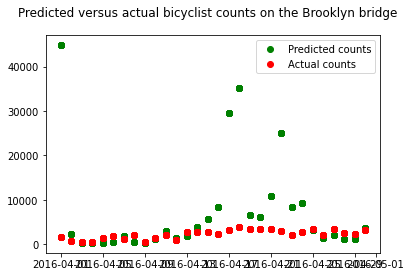

In [76]:
predicted_counts=predictions_summary_frame['mean']
actual_counts = y['Brooklyn Bridge']
fig = plt.figure()
fig.suptitle('Predicted versus actual bicyclist counts on the Brooklyn bridge')
predicted, = plt.plot(df.Date, predicted_counts, 'go', label='Predicted counts')
actual, = plt.plot(df.Date, actual_counts, 'ro', label='Actual counts')
plt.legend(handles=[predicted, actual])